<font color = green >


# Clustering part 2: Hierarchical clusterins and DBSCAN

</font>


<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use Elbow method to determine the best k for Kmeans

<font color = green >

###  Data 

</font>



In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
%matplotlib notebook

<IPython.core.display.Javascript object>


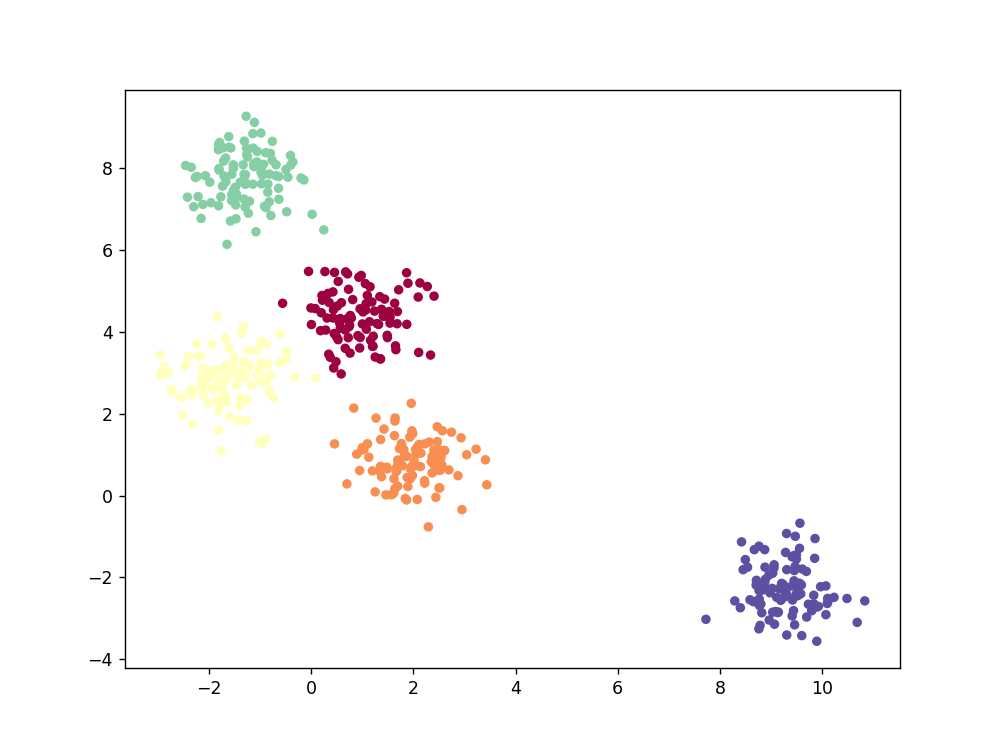

In [2]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)
colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])
plt.figure(figsize=(8,6))

plt.scatter(X[:,0], X[:,1], c= colors[y], s= 20)    

<IPython.core.display.Javascript object>


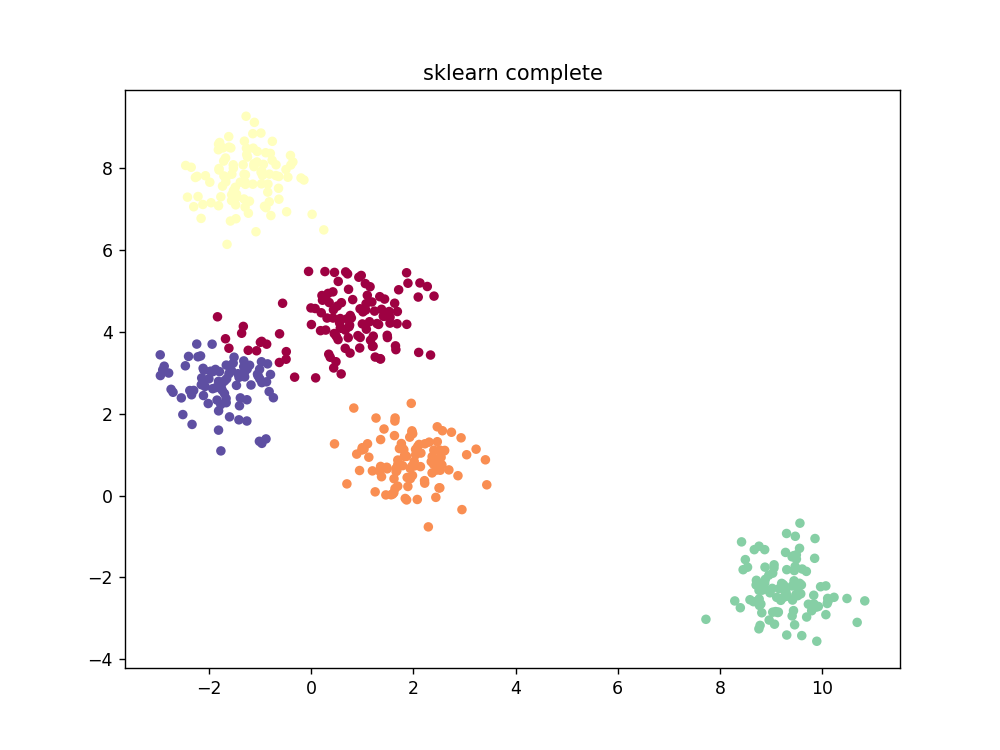

Text(0.5, 1.0, 'sklearn complete')

In [3]:
clf = AgglomerativeClustering(n_clusters=5, linkage= 'complete') 
predicted = clf.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20) 
plt.title ('sklearn complete')


<IPython.core.display.Javascript object>


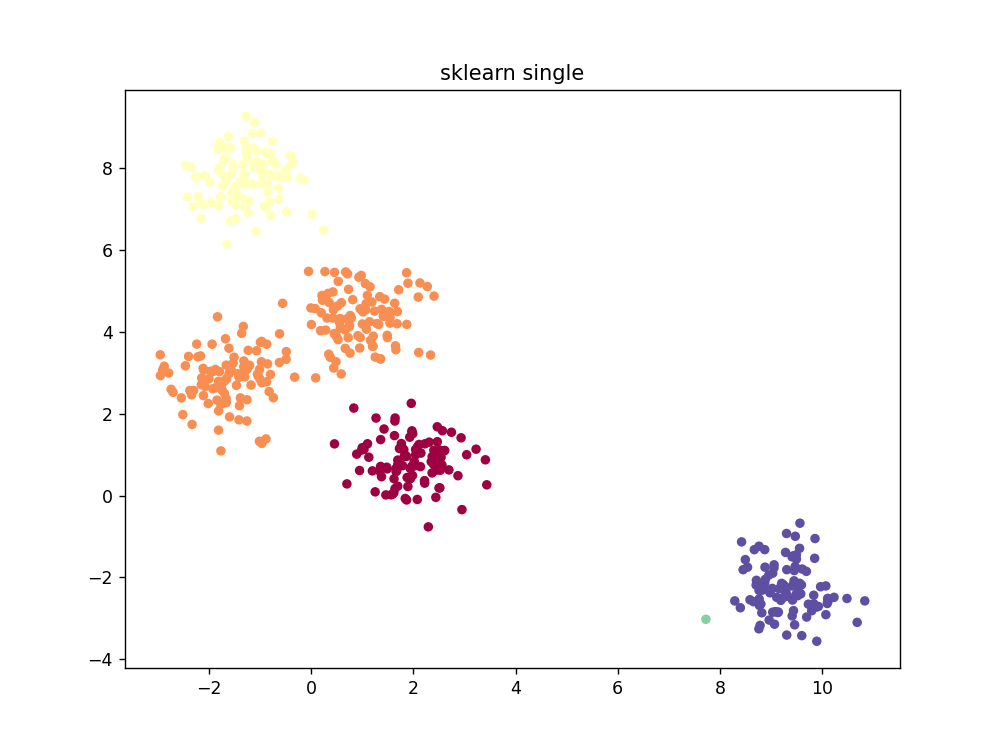

Text(0.5, 1.0, 'sklearn single')

In [4]:
clf = AgglomerativeClustering(n_clusters=5, linkage= 'single') 
predicted = clf.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20)
plt.title ('sklearn single')

<IPython.core.display.Javascript object>


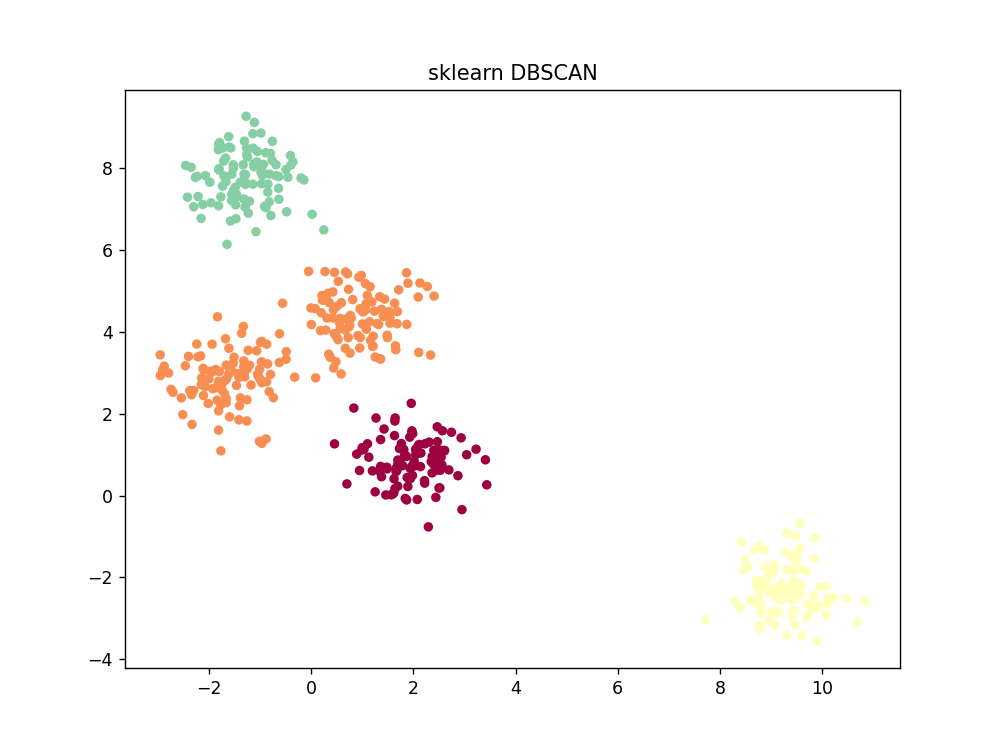

Text(0.5, 1.0, 'sklearn DBSCAN')

In [5]:
clf = DBSCAN(eps=0.9, min_samples=10).fit(X)
predicted = clf.labels_

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[predicted], s=20) 
plt.title ('sklearn DBSCAN')

In [6]:
J=[]
for clasters in range(1,25):
    clf= KMeans(n_clusters=clasters).fit(X)
    J_best=clf.inertia_
    J.append([clasters,J_best])
J = np.array(J)
print(J)

[[1.00000000e+00 1.38011190e+04]
 [2.00000000e+00 3.79806642e+03]
 [3.00000000e+00 1.64602551e+03]
 [4.00000000e+00 7.87067699e+02]
 [5.00000000e+00 3.43875903e+02]
 [6.00000000e+00 3.14542082e+02]
 [7.00000000e+00 2.89653389e+02]
 [8.00000000e+00 2.65090051e+02]
 [9.00000000e+00 2.41131493e+02]
 [1.00000000e+01 2.19696532e+02]
 [1.10000000e+01 2.01254393e+02]
 [1.20000000e+01 1.87555945e+02]
 [1.30000000e+01 1.70418980e+02]
 [1.40000000e+01 1.57457370e+02]
 [1.50000000e+01 1.42602289e+02]
 [1.60000000e+01 1.36681196e+02]
 [1.70000000e+01 1.31872780e+02]
 [1.80000000e+01 1.25565928e+02]
 [1.90000000e+01 1.18237784e+02]
 [2.00000000e+01 1.14430528e+02]
 [2.10000000e+01 1.09690846e+02]
 [2.20000000e+01 1.03462866e+02]
 [2.30000000e+01 9.95143176e+01]
 [2.40000000e+01 9.54782742e+01]]


<IPython.core.display.Javascript object>


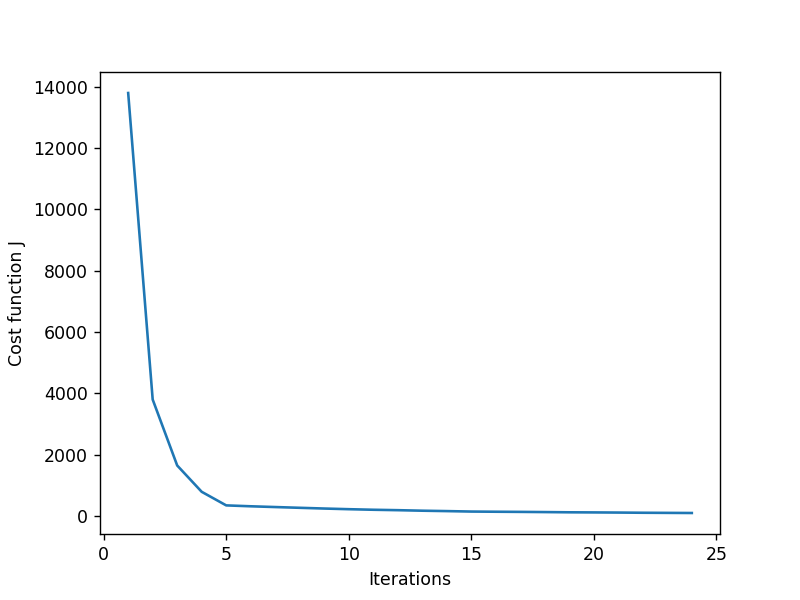

Text(0, 0.5, 'Cost function J')

In [7]:
plt.figure ()
plt.plot(J[:,0],J[:,1])
plt.xlabel('Iterations')
plt.ylabel('Cost function J')

### The best k for Kmeans by Elbow method is 5

<IPython.core.display.Javascript object>


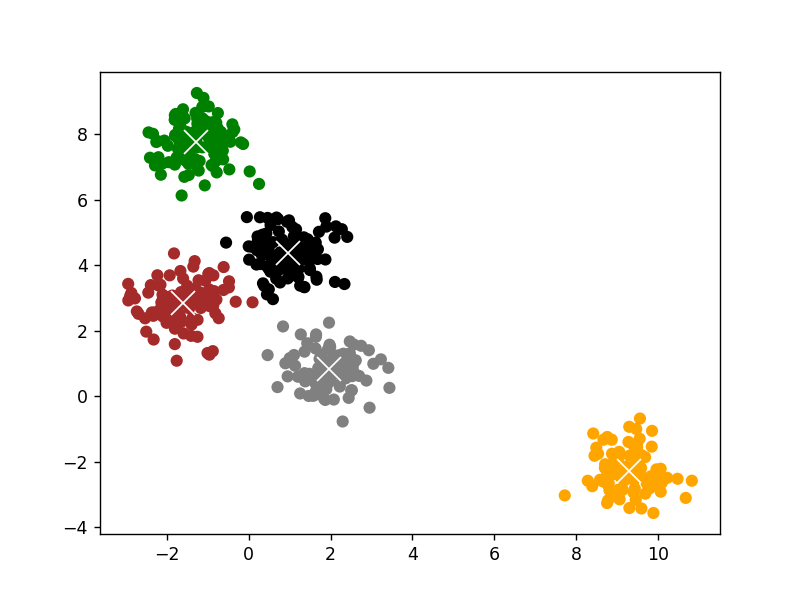

In [8]:
clf= KMeans(n_clusters=5).fit(X)
centroids = clf.cluster_centers_  
predicted = clf.predict(X)

plt.figure()
colors = np.array(['green','orange','grey', 'brown','black'])

# draw samples 
plt.scatter(X[:,0],X[:,1], c= colors[predicted])

# draw centroids 
for i, c in enumerate (clf.cluster_centers_):    
    plt.plot(c[0], c[1], marker = 'x', color= 'white', markersize=14) 